##  Using pydotviz for graph visualization

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import networkx as nx
from networkx import nx_agraph as nx_a
#from pathlib import Path

#g = dgl.graph(([0, 0, 0, 0, 0], [1, 2, 3, 4, 5]), num_nodes=6)
#print(f'{g=}')
#print(f'{g.edges()=}')


# Since the actual graph is undirected, we convert it for visualization purpose.
#g = g.to_networkx().to_undirected()
g = nx.Graph()
g.add_edges_from([(0,i) for i in range(1,6)])
print(f'{g=}')

# relabel
int2label = {0: "app", 1: "cons", 2: "with", 3: "app3", 4: "app4", 5: "app5"}
g = nx.relabel_nodes(g, int2label)

# https://networkx.org/documentation/stable/reference/drawing.html#module-networkx.drawing.layout
# Convert this to a pygraph graph
g = nx_a.to_agraph(g)
print(f'{g=}')
rep = g.string()
print(rep)

g=<networkx.classes.graph.Graph object at 0x7faf2803d840>
g=<AGraph <Swig Object of type 'Agraph_t *' at 0x7faf2803dbc0>>
strict graph "" {
	app -- cons;
	app -- with;
	app -- app3;
	app -- app4;
	app -- app5;
}



Note:  This example doesnt make use of the extensive visualization customization pygraphviz offers.

But it illustrates the interface, which requires that the graph choose a layout and that the layout
be used to generate an image file, whuch can then be readd in for display.

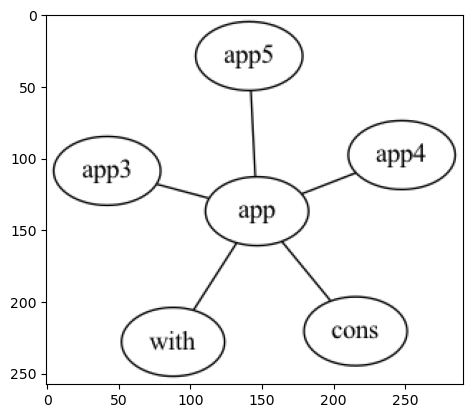

In [8]:
from pathlib import Path

# draw
g.layout()
g.draw("file.png")

# https://stackoverflow.com/questions/20597088/display-a-png-image-from-python-on-mint-15-linux
img = mpimg.imread('file.png')
plt.imshow(img)

# remove file https://stackoverflow.com/questions/6996603/how-to-delete-a-file-or-folder
# Saved file to current directory ".", now convert that to a full Posix path & unlink
Path('./file.png').expanduser().unlink()

# Or Get rid of the file.
#import os
#os.remove('./file.png')